In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
titanic = pd.read_csv('train.csv')

In [159]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [160]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [161]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [162]:
def notation(plot , coordinator , dataframe , percent = False):
        total = len(dataframe)
        for p in plot.patches:
            height = p.get_height().round(2)
            text = str(height)
            if percent == True:
                plot.text(p.get_x() + p.get_width() / 2 , height + coordinator , text + ' | ' + str(height * 100 // total) + '%' , ha = 'center')
            else:
                plot.text(p.get_x() + p.get_width() / 2 , height + coordinator , text , ha = 'center')

In [163]:
# Cleannig Survived Columns
titanic['Survived'] = titanic['Survived'].map({0: 'Dead', 1: 'Alived'})
# Cleannig Pclass Columns
titanic['Pclass'] = titanic['Pclass'].map({1:'First Class' , 2:'Second Class' , 3:'Third Class'})
# Cleannig Sex Columns
titanic['Sex'] = titanic['Sex'].map({'male':'Male' , 'female':'Female'})
# Cleannig Age Columns
titanic['Age'] = titanic['Age'].fillna(0)
titanic['Age'] = titanic['Age'].astype('int')
titanic['Age'] = titanic['Age'].apply(lambda x: 1 if x <= 1 else x)
# Cleanning Embarked Columns
titanic['Embarked'] = titanic['Embarked'].map({'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton'})

In [164]:
color_classes = {'First Class': '#FFC425', 
              'Second Class': '#D8D8D8', 
              'Third Class': '#CD8032'}

color_dead_alive = {'Dead':'#D11141',
                    'Alived':'#00B159'}

color_sex = {'Male':'#3056B9', 
             'Female':'#F99ED4'}

color_embarked = {'Cherbourg' : '#18C10F',
                  'Queenstown' : '#FBED37', 
                  'Southampton' : '#F78F49'}

In [165]:
titanic['Survived'].value_counts().to_frame()

,Survived
Dead,549
Alived,342


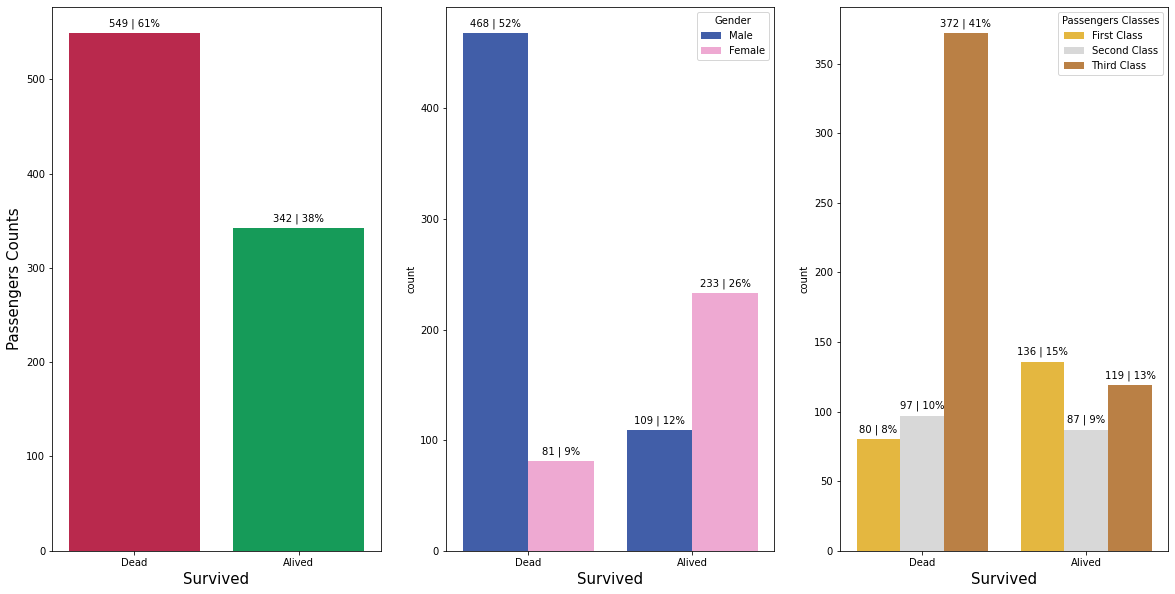

In [166]:
fig , axes = plt.subplots(1,3,figsize = (20, 10))

survived = sns.countplot(x = 'Survived' , data= titanic, palette = color_dead_alive , ax = axes[0])
notation(survived , 7 , titanic , True)
survived.set_xlabel('Survived', fontsize = 15)
survived.set_ylabel('Passengers Counts', fontsize = 15)

pclass_survived = sns.countplot(x = 'Survived' , hue = 'Pclass' , hue_order = ['First Class' , 'Second Class' , 'Third Class'] ,  data= titanic , palette = color_classes , ax = axes[2])
notation(pclass_survived , 5, titanic, True)
pclass_survived.set_xlabel('Survived', fontsize = 15)
#pclass_survived.set_ylabel('Passengers Counts', fontsize = 15)
pclass_survived.legend(title = 'Passengers Classes', fontsize = 10)

sex_survived = sns.countplot(x = 'Survived' , hue = 'Sex' , data= titanic , palette = color_sex , ax = axes[1] )
notation(sex_survived, 6, titanic, True)
sex_survived.set_xlabel('Survived', fontsize = 15)
#sex_survived.set_ylabel('Passengers Count', fontsize = 15)
sex_survived.legend(title = 'Gender', fontsize = 10)

plt.show()

In [167]:
titanic['Sex'].value_counts().to_frame()

,Sex
Male,577
Female,314


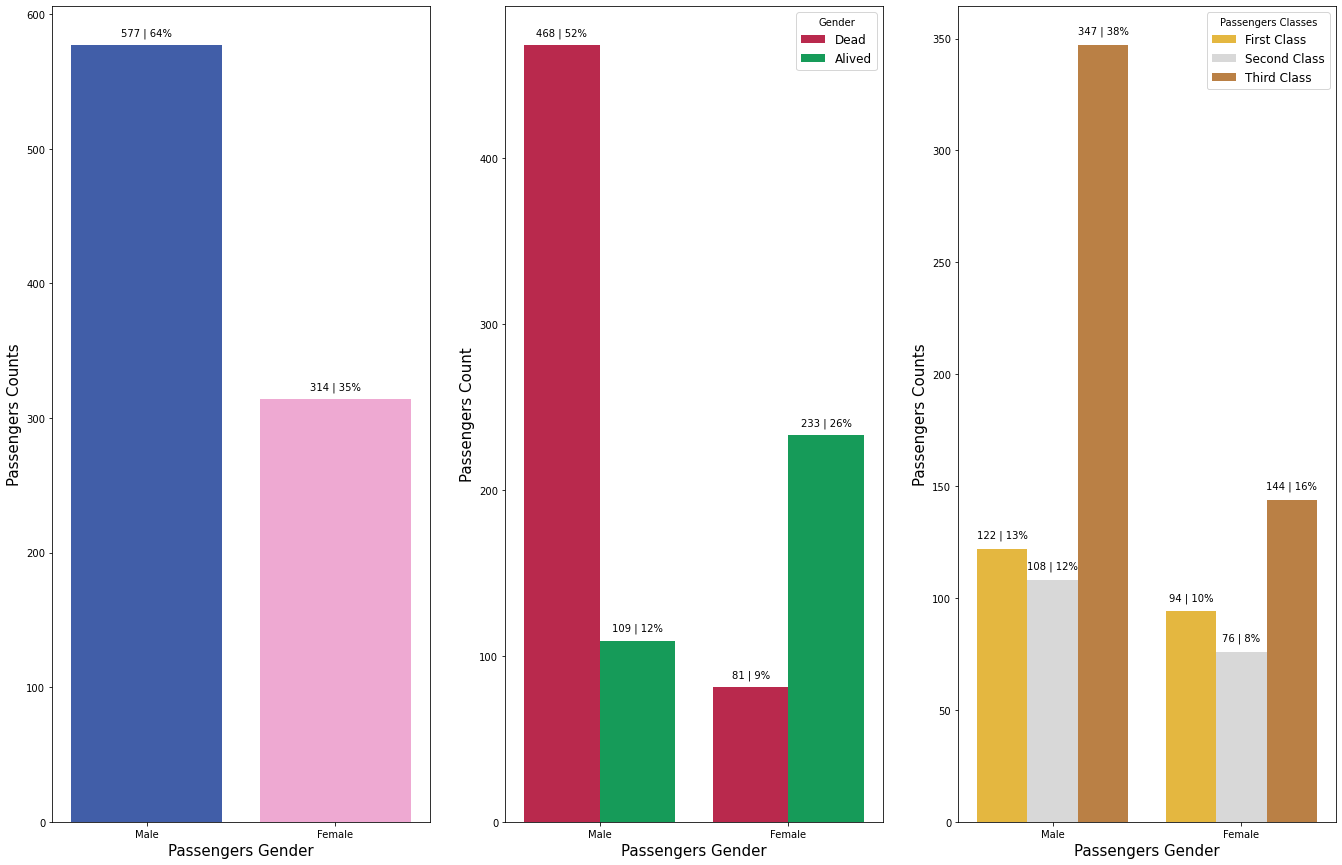

In [168]:
fig , axes = plt.subplots(1,3,figsize = (23, 15))


gender_total = sns.countplot(x = 'Sex' , data= titanic, palette = color_sex , ax = axes[0])
notation(gender_total , 7 , titanic , True)
gender_total.set_xlabel('Passengers Gender', fontsize = 15)
gender_total.set_ylabel('Passengers Counts', fontsize = 15)

gender_survived = sns.countplot(x = 'Sex' , hue = 'Survived' , data= titanic, palette = color_dead_alive , ax = axes[1])
notation(gender_survived, 6, titanic, True)
gender_survived.set_xlabel('Passengers Gender', fontsize = 15)
gender_survived.set_ylabel('Passengers Count', fontsize = 15)
gender_survived.legend(title = 'Gender', fontsize = 12)

gender_classes = sns.countplot(x = 'Sex' , hue = 'Pclass' , data = titanic, hue_order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes , ax = axes[2])
notation(gender_classes , 5, titanic , True)
gender_classes.set_xlabel('Passengers Gender', fontsize = 15)
gender_classes.set_ylabel('Passengers Counts', fontsize = 15)
gender_classes.legend(title = 'Passengers Classes' , fontsize = 12)

plt.show()


In [169]:
titanic['Pclass'].value_counts().to_frame()

,Pclass
Third Class,491
First Class,216
Second Class,184


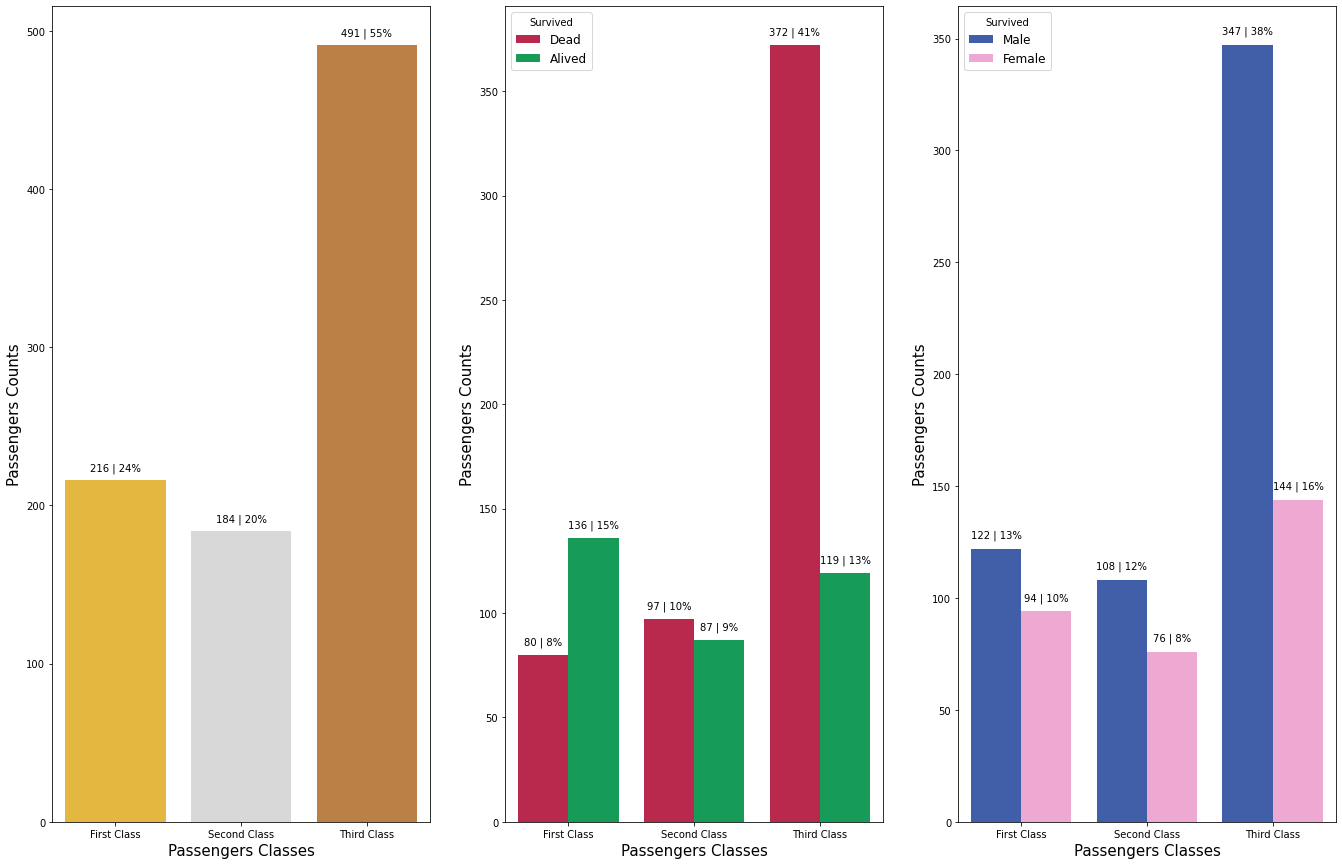

In [170]:
fig , axes = plt.subplots(1,3,figsize = (23, 15))

passenger_classes_total = sns.countplot(x = 'Pclass' , data= titanic, order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes, ax = axes[0])
notation(passenger_classes_total , 6 , titanic, True)
passenger_classes_total.set_xlabel('Passengers Classes' ,fontsize = 15)
passenger_classes_total.set_ylabel('Passengers Counts',fontsize = 15)

passenger_classes_survived = sns.countplot(x = 'Pclass' , hue = 'Survived' , data = titanic, order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_dead_alive , ax = axes[1])
notation(passenger_classes_survived , 5, titanic , True)
passenger_classes_survived.set_xlabel('Passengers Classes',fontsize = 15)
passenger_classes_survived.set_ylabel('Passengers Counts',fontsize = 15)
passenger_classes_survived.legend(title = 'Survived' , fontsize = 12)

passenger_classes_gender = sns.countplot(x = 'Pclass' , hue = 'Sex' , data = titanic, order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_sex , ax = axes[2])
notation(passenger_classes_gender , 5, titanic , True)
passenger_classes_gender.set_xlabel('Passengers Classes',fontsize = 15)
passenger_classes_gender.set_ylabel('Passengers Counts',fontsize = 15)
passenger_classes_gender.legend(title = 'Survived' , fontsize = 12)

plt.show()

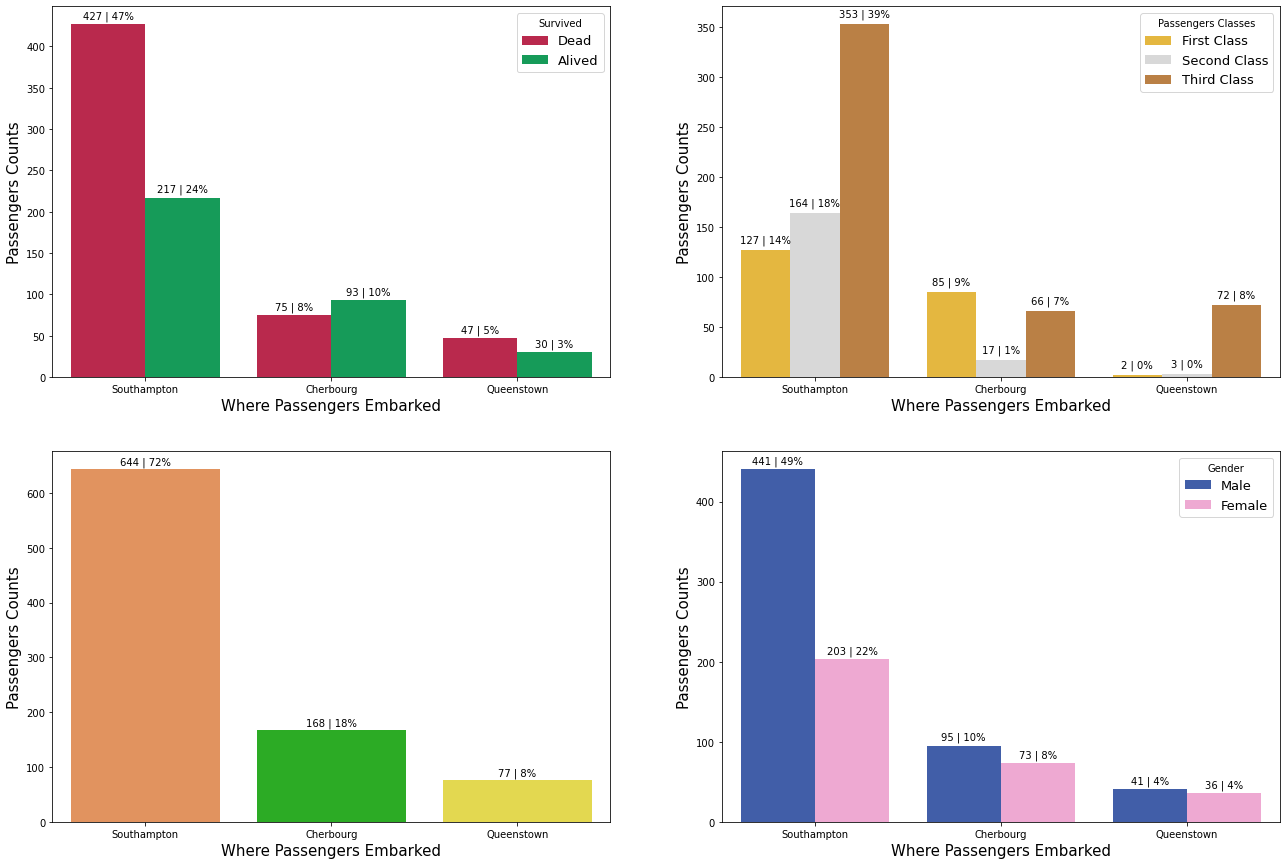

In [171]:
fig , axes = plt.subplots(2,2,figsize = (22, 15))

embarked_total = sns.countplot(x = 'Embarked'  , data = titanic, palette = color_embarked , ax = axes[1 , 0])
notation(embarked_total , 7, titanic , True)
embarked_total.set_xlabel('Where Passengers Embarked' , fontsize = 15)
embarked_total.set_ylabel('Passengers Counts' , fontsize = 15)


pclass_embarked = sns.countplot(x = 'Embarked' , hue = 'Pclass' , data = titanic, hue_order = ['First Class' , 'Second Class' , 'Third Class'] , palette = color_classes , ax = axes[ 0, 1])
notation(pclass_embarked , 7, titanic , True)
pclass_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
pclass_embarked.set_ylabel('Passengers Counts', fontsize = 15)
pclass_embarked.legend(title = 'Passengers Classes', fontsize = 13)

survived_embarked = sns.countplot(x = 'Embarked' , hue = 'Survived' , data = titanic, palette = color_dead_alive, ax = axes[0 , 0])
notation(survived_embarked , 7, titanic , True)
survived_embarked.set_xlabel('Where Passengers Embarked', fontsize = 15)
survived_embarked.set_ylabel('Passengers Counts', fontsize = 15)
survived_embarked.legend(title = 'Survived', fontsize = 13)

sex_embarked = sns.countplot(x = 'Embarked' , hue = 'Sex' , data = titanic, palette = color_sex , ax = axes[1 , 1])
notation(sex_embarked , 7, titanic , True)
sex_embarked.set_xlabel('Where Passengers Embarked' , fontsize = 15)
sex_embarked.set_ylabel('Passengers Counts' , fontsize = 15)
sex_embarked.legend(title = 'Gender', fontsize = 13)

plt.show()

In [172]:
sex_summary_stats = titanic.groupby(['Survived' , 'Sex' , 'Pclass']).agg({'Age':[np.mean , np.median , np.min , np.max] , 'Fare':[np.mean , np.median , np.min , np.max]})
sex_summary_stats.columns = ['Age Mean', 'Age Median', 'Age Min', 'Age Max', 'Ticket Price Mean', 'Ticket Price Median', 'Ticket Price Min', 'Ticket Price Max']
sex_summary_stats

Age Mean  Age Median  Age Min  Age Max  \
Survived Sex    Pclass                                                  
Alived   Female First Class   31.582418        33.0        1       63   
                Second Class  27.300000        28.0        1       55   
                Third Class   12.972222         9.0        1       63   
         Male   First Class   32.333333        35.0        1       80   
                Second Class  14.294118         3.0        1       62   
                Third Class   18.212766        20.0        1       45   
Dead     Female First Class   25.666667        25.0        2       50   
                Second Class  36.000000        32.5       24       57   
                Third Class   18.416667        18.0        1       48   
         Male   First Class   35.519481        39.0        1       71   
                Second Class  30.868132        30.0        1       70   
                Third Class   19.796667        21.0        1       74   

                              Ticket Price Mean  Ticket Price Median  \
Survived Sex    Pclass                                                 
Alived   Female First Class          105.978159             82.17080   
                Second Class          22.288989             23.00000   
                Third Class           12.464526              9.46875   
         Male   First Class           74.637320             35.50000   
                Second Class          21.095100             18.75000   
                Third Class           15.579696              8.05000   
Dead     Female First Class          110.604167            151.55000   
                Second Class          18.250000             17.00000   
                Third Class           19.773093             14.47915   
         Male   First Class           62.894910             42.40000   
                Second Class          19.488965             13.00000   
                Third Class           12.204469              7.89580   

                              Ticket Price Min  Ticket Price Max  
Survived Sex    Pclass                                            
Alived   Female First Class            25.9292          512.3292  
                Second Class           10.5000           65.0000  
                Third Class             7.2250           31.3875  
         Male   First Class            26.2875          512.3292  
                Second Class           10.5000           39.0000  
                Third Class             0.0000           56.4958  
Dead     Female First Class            28.7125          151.5500  
                Second Class           10.5000           26.0000  
                Third Class             6.7500           69.5500  
         Male   First Class             0.0000          263.0000  
                Second Class            0.0000           73.5000  
                Third Class             0.0000           69.5500